In [22]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from scipy import stats

In [31]:
url  = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv'
urllib.request.urlretrieve(url, '/Users/pramo/Desktop/IDeators/teleCust1000t.csv')

teledata = pd.read_csv('/Users/pramo/Desktop/IDeators/teleCust1000t.csv')
teledata.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [32]:
summary = pd.DataFrame(teledata.dtypes,columns=['dtypes'])

In [33]:
summary

,dtypes
region,int64
tenure,int64
age,int64
marital,int64
address,int64
income,float64
ed,int64
employ,int64
retire,float64
gender,int64


In [34]:
summary = summary.reset_index()
summary['Name'] = summary['index']

In [35]:
summary = summary[['Name','dtypes']]
summary

,Name,dtypes
0,region,int64
1,tenure,int64
2,age,int64
3,marital,int64
4,address,int64
5,income,float64
6,ed,int64
7,employ,int64
8,retire,float64
9,gender,int64


In [36]:
summary['Missing'] = teledata.isnull().sum().values

In [37]:
summary['Uniques'] = teledata.nunique().values
summary['First Value'] = teledata.loc[0].values
summary['Second Value'] = teledata.loc[1].values
summary['Third Value'] = teledata.loc[2].values

In [38]:
summary

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,region,int64,0,3,2.0,3.0,3.0
1,tenure,int64,0,72,13.0,11.0,68.0
2,age,int64,0,60,44.0,33.0,52.0
3,marital,int64,0,2,1.0,1.0,1.0
4,address,int64,0,50,9.0,7.0,24.0
5,income,float64,0,218,64.0,136.0,116.0
6,ed,int64,0,5,4.0,5.0,1.0
7,employ,int64,0,46,5.0,5.0,29.0
8,retire,float64,0,2,0.0,0.0,0.0
9,gender,int64,0,2,0.0,0.0,1.0


In [39]:
for name in summary['Name']:
    print(name)

region
tenure
age
marital
address
income
ed
employ
retire
gender
reside
custcat


In [46]:
for name in summary['Name'].value_counts().index:
    summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(teledata[name].value_counts(normalize=True), base=2),2)

In [49]:
summary


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,region,int64,0,3,2.0,3.0,3.0,1.58
1,tenure,int64,0,72,13.0,11.0,68.0,6.10
2,age,int64,0,60,44.0,33.0,52.0,5.59
3,marital,int64,0,2,1.0,1.0,1.0,1.00
4,address,int64,0,50,9.0,7.0,24.0,4.97
5,income,float64,0,218,64.0,136.0,116.0,7.03
6,ed,int64,0,5,4.0,5.0,1.0,2.21
7,employ,int64,0,46,5.0,5.0,29.0,4.89
8,retire,float64,0,2,0.0,0.0,0.0,0.27
9,gender,int64,0,2,0.0,0.0,1.0,1.00


In [50]:
teledata.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [54]:
total_amt = teledata.groupby(['custcat'])['income'].sum()

In [55]:
total_amt

custcat
1    14566.0
2    16239.0
3    25018.0
4    21712.0
Name: income, dtype: float64

In [57]:
t =total_amt.reset_index()
t

,custcat,income
0,1,14566.0
1,2,16239.0
2,3,25018.0
3,4,21712.0


In [53]:
i  = teledata['income'].sum()
i

77535.0

In [41]:
s2.loc[summary['Name'] == 'region', 'dtypes']

0    int64
Name: dtypes, dtype: object

In [44]:
s2

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,region,int64,0,3,2.0,3.0,3.0
1,tenure,int64,0,72,13.0,11.0,68.0
2,age,int64,0,60,44.0,33.0,52.0
3,marital,int64,0,2,1.0,1.0,1.0
4,address,int64,0,50,9.0,7.0,24.0
5,income,float64,0,218,64.0,136.0,116.0
6,ed,int64,0,5,4.0,5.0,1.0
7,employ,int64,0,46,5.0,5.0,29.0
8,retire,float64,0,2,0.0,0.0,0.0
9,gender,int64,0,2,0.0,0.0,1.0


In [25]:
summary

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,region,int64,0,3,2.0,3.0,3.0,1.58
1,tenure,int64,0,72,13.0,11.0,68.0,6.10
2,age,int64,0,60,44.0,33.0,52.0,5.59
3,marital,int64,0,2,1.0,1.0,1.0,1.00
4,address,int64,0,50,9.0,7.0,24.0,4.97
5,income,float64,0,218,64.0,136.0,116.0,7.03
6,ed,int64,0,5,4.0,5.0,1.0,2.21
7,employ,int64,0,46,5.0,5.0,29.0,4.89
8,retire,float64,0,2,0.0,0.0,0.0,0.27
9,gender,int64,0,2,0.0,0.0,1.0,1.00


In [14]:
summary['Name'].value_counts()

reside     1
income     1
tenure     1
marital    1
employ     1
age        1
address    1
retire     1
custcat    1
ed         1
region     1
gender     1
Name: Name, dtype: int64

In [10]:
w1 = teledata[0:499]
w2 = teledata[500:1000]

In [14]:
np.sum(w1['region'].isin(w2['region'].unique()))

499

In [16]:
w2.shape

(500, 12)

In [28]:
q1 = pd.DataFrame(columns=['a'], data=[1,2,1,3,2,1,2])
q2 = pd.DataFrame(columns=['a'], data=[1,1,1])

In [29]:
np.sum(q1['a'].isin(q2['a'].unique()))

3

In [30]:
q2['a'].unique()

array([1], dtype=int64)

In [9]:
teledata.shape

(1000, 12)

In [81]:
teledata.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [82]:
for col in teledata.columns:
    print (col)
    print (teledata[col].isnull().value_counts() )
    print ('')

region
False    1000
Name: region, dtype: int64

tenure
False    1000
Name: tenure, dtype: int64

age
False    1000
Name: age, dtype: int64

marital
False    1000
Name: marital, dtype: int64

address
False    1000
Name: address, dtype: int64

income
False    1000
Name: income, dtype: int64

ed
False    1000
Name: ed, dtype: int64

employ
False    1000
Name: employ, dtype: int64

retire
False    1000
Name: retire, dtype: int64

gender
False    1000
Name: gender, dtype: int64

reside
False    1000
Name: reside, dtype: int64

custcat
False    1000
Name: custcat, dtype: int64



[]

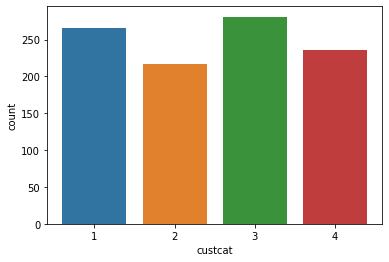

In [83]:
cust = teledata['custcat']
sns.countplot(cust)
plt.plot()

In [84]:
teledata['income'].shape

(1000,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7794030B8>]],
      dtype=object)

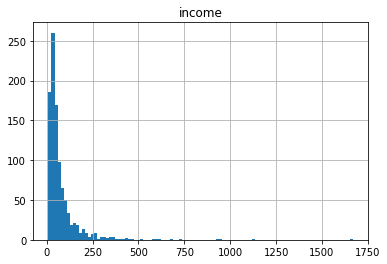

In [85]:
teledata.hist(column='income', bins = 100)

In [86]:
teledata['retire'].value_counts()

0.0    953
1.0     47
Name: retire, dtype: int64

In [87]:
X = teledata[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [88]:
y  = teledata['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [90]:
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 4) 
print('Train Data', X_train.shape, y_train.shape)
print('Test Data', X_test.shape, y_test.shape)

Train Data (800, 11) (800,)
Test Data (200, 11) (200,)


In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
k = 4
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [98]:
yhat = knn.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [101]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [104]:
ks= 15
accuracy  = []
for n in range(1, ks):
    knn= KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, yhat))

accuracy

[0.3,
 0.29,
 0.315,
 0.32,
 0.315,
 0.31,
 0.335,
 0.325,
 0.34,
 0.33,
 0.315,
 0.34,
 0.33,
 0.315]

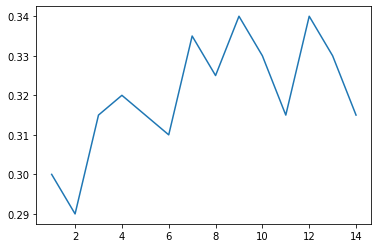

In [107]:
plt.plot(range(1,ks),accuracy)

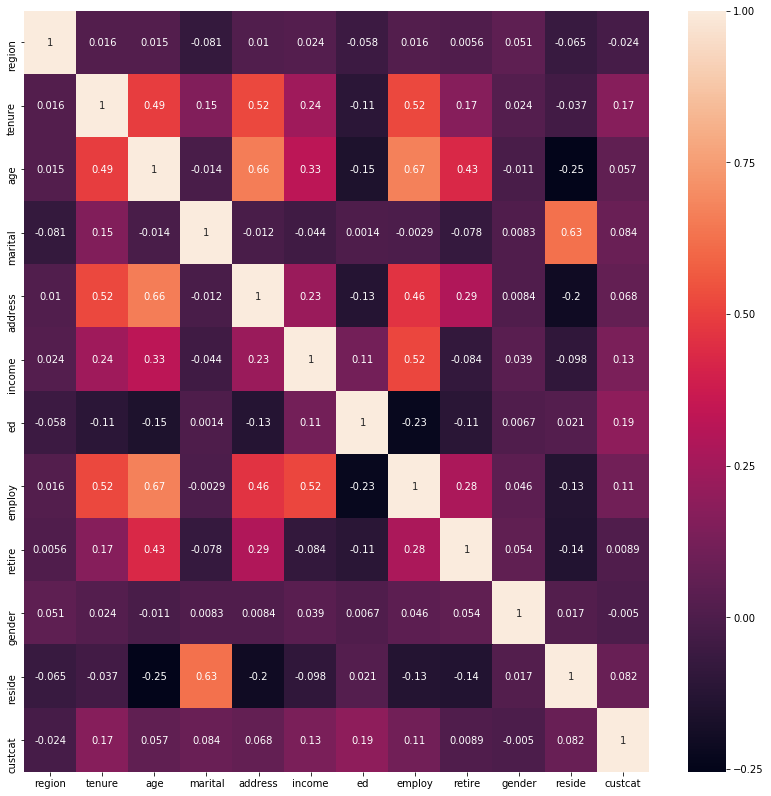

In [114]:
corr =teledata.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr ,cbar = True, annot = True)

In [116]:
teledata.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [117]:
teledata.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [147]:
X2 = teledata[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
y2 = teledata['custcat']

In [157]:
X2 = preprocessing.MinMaxScaler().fit_transform(X2)
#X2 = preprocessing.MinMaxScaler().fit(X2).transform(X2.astype(float))

In [158]:
X2[0:4]

array([[0.5       , 0.16901408, 0.44067797, 1.        , 0.16363636,
        0.0331525 , 0.75      , 0.10638298, 0.        , 0.        ,
        0.14285714],
       [1.        , 0.14084507, 0.25423729, 1.        , 0.12727273,
        0.07655214, 1.        , 0.10638298, 0.        , 0.        ,
        0.71428571],
       [1.        , 0.94366197, 0.57627119, 1.        , 0.43636364,
        0.06449668, 0.        , 0.61702128, 0.        , 1.        ,
        0.14285714],
       [0.5       , 0.45070423, 0.25423729, 0.        , 0.21818182,
        0.01446655, 0.25      , 0.        , 0.        , 1.        ,
        0.        ]])

In [161]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size = 0.8,  random_state= 6)
print('Train data', X2_train.shape, y2_train.shape)
print('Test data', X2_test.shape, y2_test.shape)

Train data (800, 11) (800,)
Test data (200, 11) (200,)


In [164]:
ks=15
accuracy2=[]
for n in range(1,ks):
    knn = KNeighborsClassifier(n_neighbors= n).fit(X2_train,y2_train)
    pre= knn.predict(X2_test)
    accuracy2.append(metrics.accuracy_score(y2_test, pre))
    

In [171]:
accuracy2

[0.265,
 0.31,
 0.305,
 0.35,
 0.33,
 0.295,
 0.3,
 0.29,
 0.315,
 0.295,
 0.315,
 0.29,
 0.315,
 0.31]